In [4]:
import mpmath as mp
import matplotlib.pyplot as plt
from qutip import *
import numpy as np

In [170]:
def bose(w,beta):
    if w==0:
        return 0
    else:
        return 1/(np.exp(beta*w)-1)
def correlation_function(t,alpha=0.2,wc=20,s=1):
    return np.array(2*alpha*mp.gamma(s+1)*(wc)**(s+1) *(1+1j*wc*t)**(-(s+1)),dtype=np.complex128)
def power_spectrum(w,alpha=0.1,wc=20,s=1):
    return np.array(2*(bose(1,1e20)+1)*alpha *(wc)**(1-s) * w**s *np.exp(-abs(w)/wc) ,dtype=np.complex128)

In [219]:
t=np.linspace(0,5,1000)
tt=np.linspace(0,50,1000)
C=correlation_function(t)
C2=correlation_function(t,s=0.1)

In [206]:
Hsys=0.5*(sigmaz()/2 + sigmax()/2)
Q=sigmaz()

In [213]:
fc=heom.CorrelationFitter(Q,0,t,C)
fc2=heom.CorrelationFitter(Q,0,t,C2)

In [234]:
bath,fitinfo=fc.get_fit(Ni=5,Nr=4)

In [235]:
print(fitinfo["summary"])

Fit correlation class instance: 
 
Result of fitting The Real Part Of                                      |Result of fitting The Imaginary Part                                    
 the Correlation Function with 4 terms:                                 | Of the Correlation Function with 5 terms:                              
                                                                        |                                                                        
 Parameters|    a     |    b     |    c                                 | Parameters|    a     |    b     |    c                                 
 1         |-3.13e+01 |-7.56e+00 |1.71e+00                              | 1         |-2.08e+03 |-9.31e+01 |1.95e+01                              
 2         |-2.33e+00 |-1.67e+00 |8.17e-07                              | 2         |-2.08e+03 |-4.09e+01 |4.32e+00                              
 3         | 9.45e+02 |-4.61e+01 |1.71e+01                              | 3         |-6.5

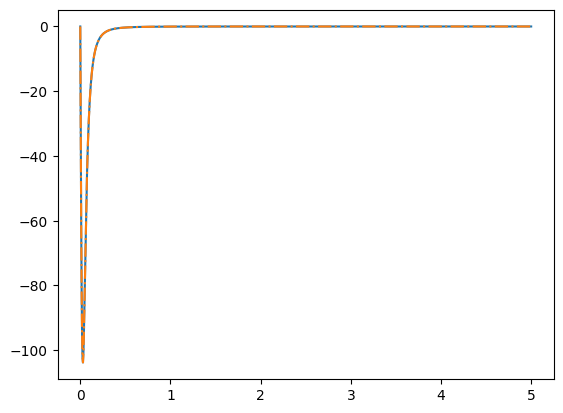

In [236]:
plt.plot(t,np.imag(C))
plt.plot(t,np.imag(bath.correlation_function_approx(t)),'-.')

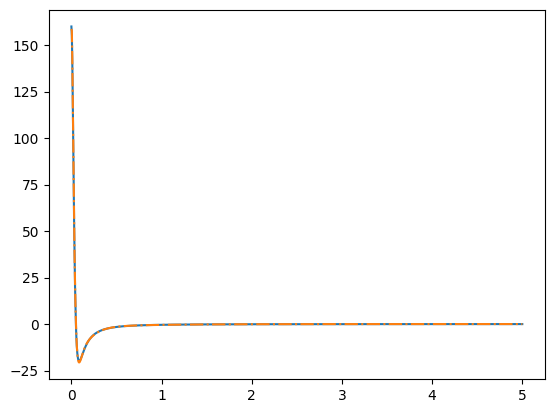

In [237]:
plt.plot(t,np.real(C))
plt.plot(t,np.real(bath.correlation_function_approx(t)),'-.')

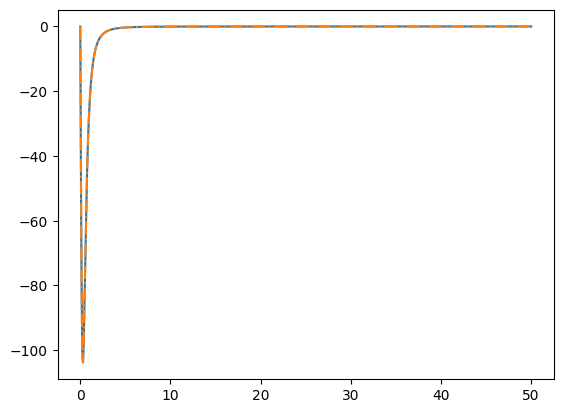

In [238]:
plt.plot(tt,np.imag(C))
plt.plot(tt,np.imag(bath.correlation_function_approx(t)),'-.')

In [239]:
bath2,fitinfo2=fc2.get_fit(Ni=3,Nr=3)

In [240]:
print(fitinfo2["summary"])

Fit correlation class instance: 
 
Result of fitting The Real Part Of                                      |Result of fitting The Imaginary Part                                    
 the Correlation Function with 3 terms:                                 | Of the Correlation Function with 3 terms:                              
                                                                        |                                                                        
 Parameters|    a     |    b     |    c                                 | Parameters|    a     |    b     |    c                                 
 1         |-4.26e+00 |-7.85e+01 |5.70e+01                              | 1         |-1.07e+02 |-9.49e-01 |6.34e-03                              
 2         | 3.69e-01 |-3.04e+00 |4.08e+00                              | 2         |-1.07e+02 |-5.65e+00 |2.01e-01                              
 3         | 1.42e+01 |-2.45e+01 |4.91e-10                              | 3         |-1.0

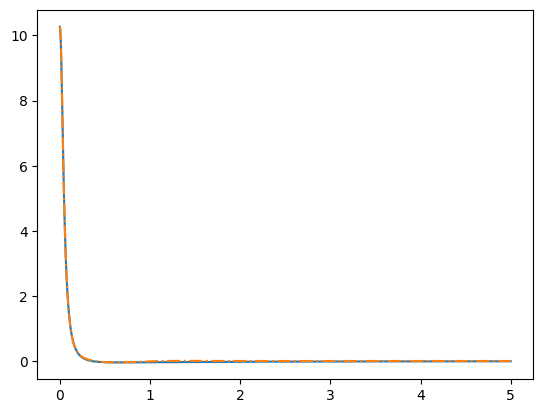

In [241]:
plt.plot(t,np.real(C2))
plt.plot(t,np.real(bath2.correlation_function_approx(t)),'-.')

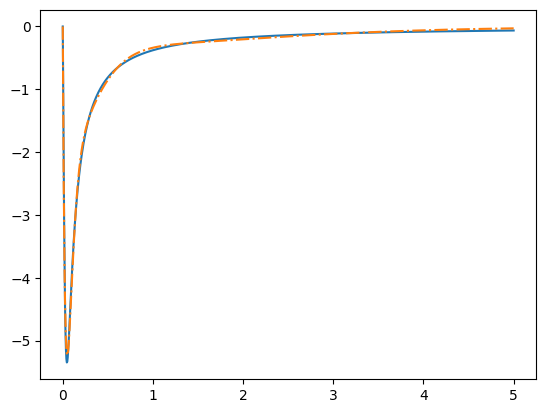

In [242]:
plt.plot(t,np.imag(C2))
plt.plot(t,np.imag(bath2.correlation_function_approx(t)),'-.')

In [243]:
tlist=np.linspace(0,150,1000)
rho0=Qobj([[1,0],[0,0]])

In [244]:
options = {'nsteps':15000, 'store_states':True, 'rtol':1e-12, 'atol':1e-12, 'method':"bdf"}
HEOM2= heom.HEOMSolver(Hsys, bath2, max_depth=6,options=options)# you can use three or 4 and it will work the same Marek :)
heom2=HEOM2.run(rho0,tlist)

10.0%. Run time: 126.32s. Est. time left: 00:00:18:55
20.0%. Run time: 222.62s. Est. time left: 00:00:14:49
30.0%. Run time: 342.97s. Est. time left: 00:00:13:19
40.0%. Run time: 473.85s. Est. time left: 00:00:11:49
50.1%. Run time: 584.92s. Est. time left: 00:00:09:43
60.1%. Run time: 682.28s. Est. time left: 00:00:07:33
70.1%. Run time: 765.24s. Est. time left: 00:00:05:26
80.1%. Run time: 825.18s. Est. time left: 00:00:03:25
90.1%. Run time: 886.85s. Est. time left: 00:00:01:37
100.0%. Run time: 952.40s. Est. time left: 00:00:00:00
Total run time: 952.40s


In [248]:
options = {'nsteps':15000, 'store_states':True, 'rtol':1e-12, 'atol':1e-12, 'method':"bdf"}
HEOM1= heom.HEOMSolver(Hsys, bath, max_depth=6,options=options)# you can use three or 4 and it will work the same Marek :)
heom1=HEOM1.run(rho0,tlist)

10.0%. Run time: 563.86s. Est. time left: 00:01:24:29
20.0%. Run time: 963.98s. Est. time left: 00:01:04:11
30.0%. Run time: 1372.70s. Est. time left: 00:00:53:18
40.0%. Run time: 1661.19s. Est. time left: 00:00:41:27
50.1%. Run time: 1965.03s. Est. time left: 00:00:32:41
60.1%. Run time: 2300.41s. Est. time left: 00:00:25:29
70.1%. Run time: 2610.36s. Est. time left: 00:00:18:34
80.1%. Run time: 2917.25s. Est. time left: 00:00:12:05
90.1%. Run time: 3238.29s. Est. time left: 00:00:05:56
100.0%. Run time: 3550.06s. Est. time left: 00:00:00:00
Total run time: 3550.06s


In [249]:
def projection(result,i,j):
    try:
        return np.array([result.states[k][i,j] for k in range(len(result.states))])
    except:
        return np.array([result[k][i,j] for k in range(len(result))])

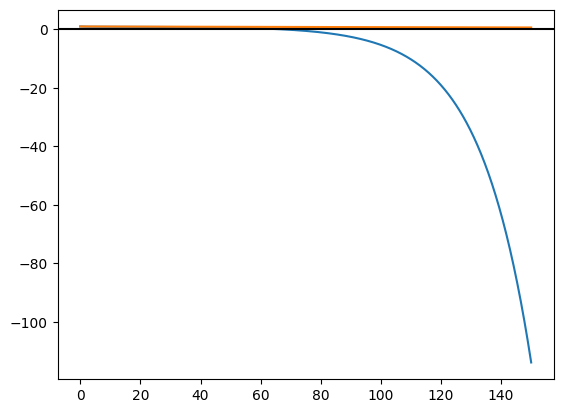

In [250]:
plt.plot(tlist,np.real(projection(heom2,0,0)))
plt.plot(tlist,np.real(projection(heom1,0,0)))
plt.axhline(y=0,color='k')